In [1]:
# loading the Mall Customer dataset from kaggle

import pandas as pd

df = pd.read_csv("customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# drop unnecessary columns

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(data)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [8]:
# perform scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


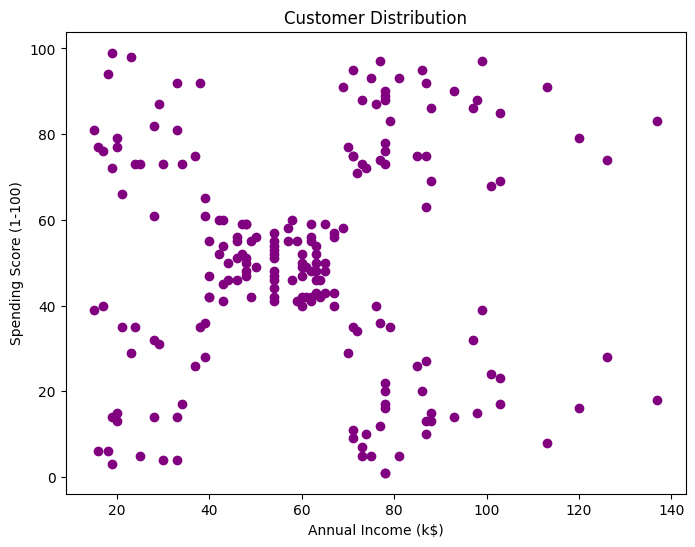

In [23]:
# now viusalize the exploration of groupings

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='purple')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

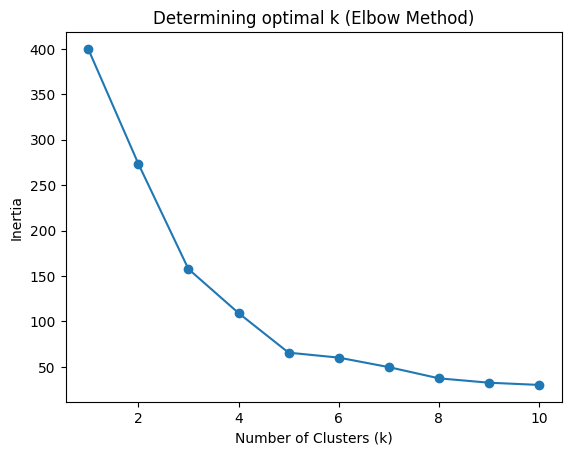

In [25]:
# apply K-Means clustering

from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters=5, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.labels_


# Determine Optimal number of clusters using the Elbow Method
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# visualize the clusters using 2D plots
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Determining optimal k (Elbow Method)")
plt.show()

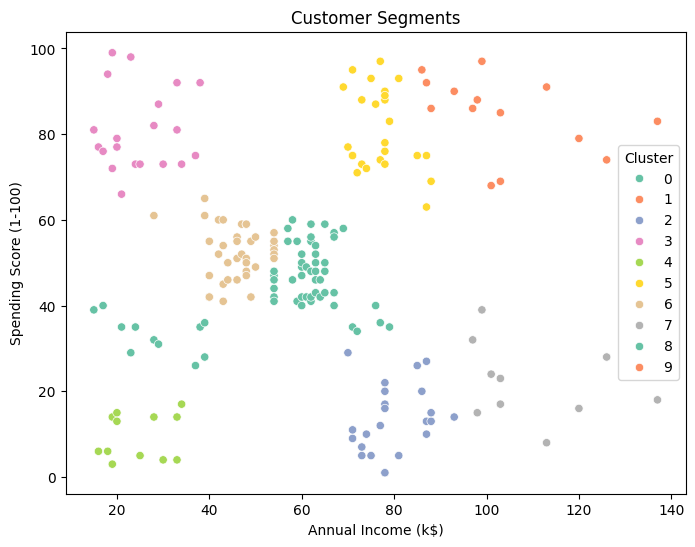

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 62.583333               47.291667
1                 97.090909               86.090909
2                 79.739130               13.391304
3                 24.950000               81.000000
4                 24.583333                9.583333
5                 76.960000               80.800000
6                 45.891892               52.378378
7                109.700000               22.000000
8                 28.181818               33.272727
9                127.666667               78.666667


In [41]:
# now moving to the bonus part

# applying KMeans with best k, for now i am taking 10 number of clusters (k=10)
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data.loc[:,'Cluster'] = clusters

# visualizing each cluster
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set2'
)
plt.title('Customer Segments')
plt.show()

# shows average income and spending per cluster
cluster_avg = df.copy()
cluster_avg['Cluster'] = clusters
print(cluster_avg.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

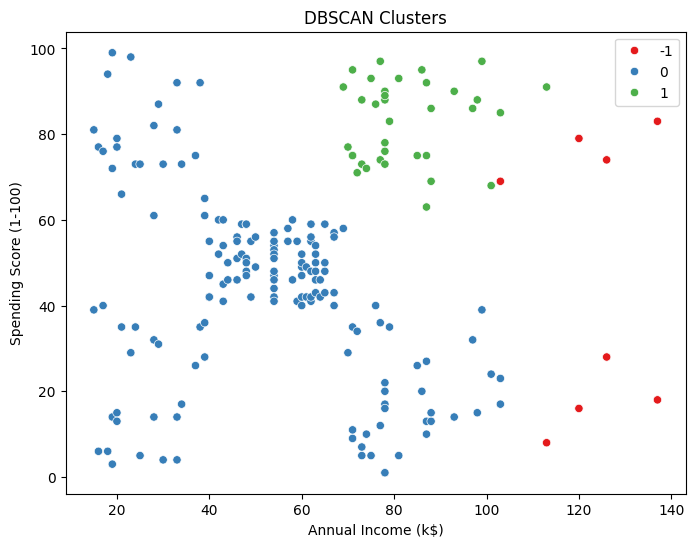

In [39]:
# trying different clustering algorithms such as DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=db_clusters, palette='Set1')
plt.title('DBSCAN Clusters')
plt.show()